In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
import os

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [ ]:
from google.colab import drive

In [ ]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import shutil

In [ ]:
img=cv2.imread(os.path.join('/content/drive/MyDrive/dr_dataset1/DR/1000.jpg'))
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

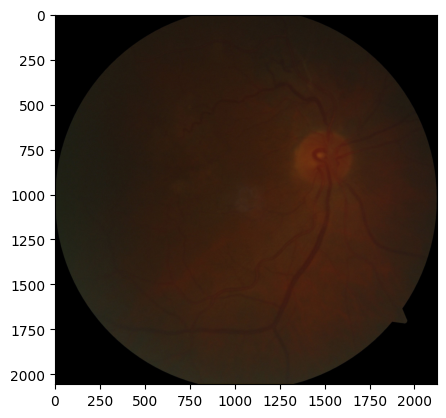

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
data_dir = "/content/drive/MyDrive/dr_dataset1"

In [ ]:
import numpy as np

In [ ]:
!ls /content/drive/MyDrive/dr_dataset1

DR  No_DR


In [ ]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dr_dataset1')

Found 1428 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch =  data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

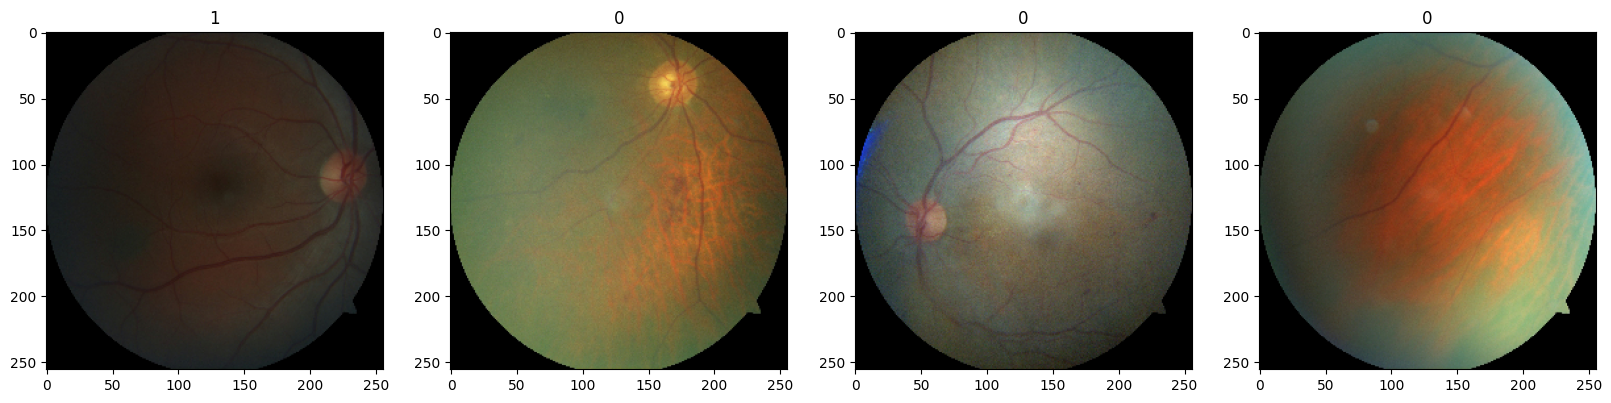

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

0.9998372

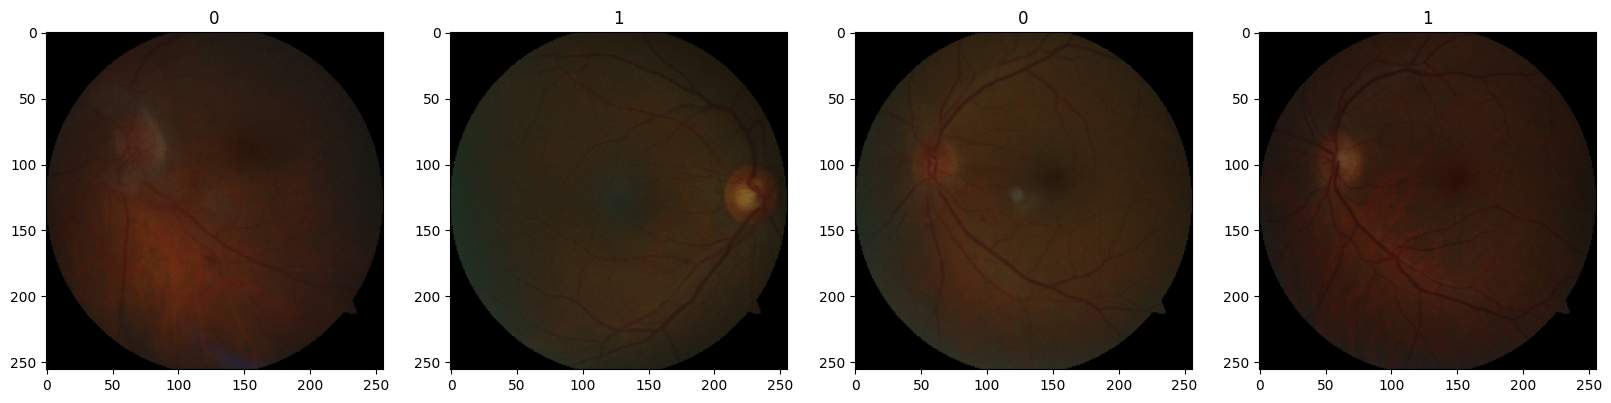

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

45

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)* .2)
test_size = int(len(data)* .1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
print(train_size, val_size, test_size)

31 9 4


In [ ]:
len(test)

4

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [ ]:
# for layer in base_model.layers:
#     layer.trainable = False

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss=tf.losses.BinaryCrossentropy(),
             metrics = ["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 256, 256, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 256, 256, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 256, 256, 3)          0         ['normalization_1[0][0]'

In [ ]:
model.fit(train, epochs=20, validation_data=val, )

Epoch 1/20
31/31 [==============================] - 285s 7s/step - loss: 0.7261 - accuracy: 0.4970 - precision: 0.4931 - recall: 0.4361 - val_loss: 0.7248 - val_accuracy: 0.4931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
31/31 [==============================] - 287s 9s/step - loss: 0.7160 - accuracy: 0.4909 - precision: 0.4943 - recall: 0.5170 - val_loss: 0.7006 - val_accuracy: 0.5139 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
31/31 [==============================] - 238s 7s/step - loss: 0.6972 - accuracy: 0.4798 - precision: 0.4749 - recall: 0.3226 - val_loss: 0.6934 - val_accuracy: 0.4861 - val_precision: 0.4861 - val_recall: 1.0000
Epoch 4/20
31/31 [==============================] - 235s 7s/step - loss: 0.6932 - accuracy: 0.4960 - precision: 0.4960 - recall: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.5174 - val_precision: 0.5174 - val_recall: 1.0000
Epoch 5/20
31/31 [==============================] - 236s 7s/step - loss: 0.6932 - accuracy: 

In [ ]:
model.evaluate(test)

4/4 [==============================] - 68s 3s/step - loss: 0.6932 - accuracy: 0.4766 - precision: 0.4766 - recall: 1.0000


[0.6931692361831665, 0.4765625, 0.4765625, 1.0]